<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

**<center><h3>Decision Tree Assignment Solution</h3></center>**

---
# **Table of Contents**
---

**1.** [**Problem Statement**](#Section1)<br>
**2.** [**Objective**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)<br>

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Post Data Processing**](#Section7)<br>
  - **7.1** [**Feature Encoding**](#Section71)
  - **7.2** [**Feature Scaling**](#Section72)
  - **7.3** [**Data Preparation**](#Section73)
  
**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Conclusion**](#Section9)<br>


---
<a name = Section1></a>
# **1. Problem Statement**
---

- Exploring publicly available data from __LendingClub.com__.

- Lending Club connects people who need money __(borrowers)__ with people who have money __(investors)__.

  - Try to create a model that will help predict people who have a profile of having a __high probability of paying back__.

  - Lending club had a very interesting year in __2016__.
  
  - This data is from _before they even went public_.

---
<a name = Section2></a>
# **2. Objective**
---

- The objective of this assignment is to classify and predict whether or not the borrower paid back their loan in full.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
!pip install -q datascience                                                       # Package that is required by pandas profiling
!pip install -q pandas-profiling  

     |████████████████████████████████| 71kB 4.4MB/s 


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [ ]:
!pip install -q --upgrade pandas-profiling

<a name = Section33></a>
### **3.3 Importing Libraries**

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                               # Importing for panel data analysis
from pandas_profiling import ProfileReport                                        # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                                        # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                                       # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                                           # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                                    # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                                # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                                   # Importing pyplot interface using matplotlib
import seaborn as sns                                                             # Importing seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                                  # Importing Standard Scaler library from preprocessing
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                              # To split the data in training and testing part 
from sklearn.model_selection import cross_val_score                               # Importing cross validation score from model selection
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.tree import DecisionTreeClassifier                                   # Loading decision tree classifier from tree
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import precision_recall_curve                                # For precision and recall metric estimation
from sklearn.metrics import classification_report                                 # To generate complete report of evaluation metrics
from sklearn.metrics import plot_confusion_matrix                                 # To plot confusion matrix
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                                   # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")     

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---
- The dataset has been provided by lending club and its description is shown below in the table.

</br>

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 9578 | 14 | 733 KB | 

</br>

|Id|Feature|Description|
|:--|:--|:--|
|01|**credit.policy**|1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.|
|02|**purpose**|The purpose to get the loan.|
|03|**int.rate**|	The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). |
|||Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.|
|04|**installment**|The monthly installments owed by the borrower if the loan is funded.|
|05|**log.annual.inc**|The natural log of the self-reported annual income of the borrower.|
|06|**dti**|The debt-to-income ratio of the borrower (amount of debt divided by annual income).|
|07|**fico**|The FICO credit score of the borrower.|
|08|**days.with.cr.line**|The number of days the borrower has had a credit line.|
|09|**revol.bal**|The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).|
|10|**revol.util**|The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).|
|11|**inq.last.6mths**|The borrower's number of inquiries by creditors in the last 6 months.|
|12|**delinq.2yrs**|The number of times the borrower had been 30+ days past due on a payment in the past 2 years.|
|13|**pub.rec**|The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).|
|14|**not.fully.paid**|Whether the loan amount fully paid or not.|


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/loan_data.csv')
print('Data Shape:', data.shape)
data.head()

Data Shape: (9578, 14)


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **description** and **statistics** about the data.

In [ ]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


**Observations:**

> **credit.policy:**
- Majority of the customers meets the criteria of lending club.

> **int.rate:**
- The average interest rate is 12.26%.
- 25% of the customers are bound with the interest rate of 10.3%
- 50% of the customers are bound with the interest rate of 12.2%.
- 75% of the customers are bound with the interest rate of 14%.

- Similarly, rest of the information can be extracted using the above descriptive values.

<a name = Section42></a>
### **4.2 Data Information**

 - In this section, we will get **information about the data** and see some observations.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


**Observation:**

- We can observe that there is **no null data present** and all the **features** have **correct data types**.

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

In [ ]:
# profile = ProfileReport(df=data)
# profile.to_file(output_file='Pre Profiling Report.html')
# print('Accomplished!')

**Observations:**

- Report shows that there are in **total 14 features** out of which **11 are numerical** and **3 are categorical**.

- There is **no missing** and **no duplicate** data present in the dataset.

- The **credit.policy** and **not.fully.paid** feature are found to have **inconsistent data type**.

- Following set of features are found to have zero values:
  - revol.bal (3.4%), revol.util (3.1%), inq.last.6mnths (38%), delinq.2yrs (88.3%), pub.rec (94.2%)

- Following set of features are found to have high correlation among each other:
  - credit.policy &lrarr; inq.last.6mths
  - int.rate &lrarr; fico
  - revolt.util &lrarr; fico
  - revol.bal &lrarr; revol.util
  - int.rate &lrarr; revol.util

**Peforming Cleaning Operations**

---
**<h4>Question 1:** Create a function that transform credit.policy and not.fully.paid to correct data type.</h4>

---

<details>

**<summary>Hint:</summary>**

- You can use pandas .as_type() functionality to handle inconsistent data types.

</details>

In [ ]:
def transCorrectType(feature=None, type=None):
  data[feature] = data[feature].astype(type)

In [ ]:
transCorrectType(feature='credit.policy', type=int)
transCorrectType(feature='not.fully.paid', type=int)

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

---
**<h4>Question 2:** Create a function that generate distribution of fico feature for each credit policy.</h4>

---

<details>

**<summary>Hint:</summary>**

- You can plot the frequency distribution and proportion using seaborn histplot function.

- You can use hue parameter for the credit.policy and add some cosmetics to make you graph look better.

</details>

In [ ]:
def ficoCreditPolicyDist():
  # Initiating a figure size of 15 X 7 inches
  plt.figure(figsize=(15, 7))

  # Plot histogram using seaborn api
  sns.histplot(data=data, x='fico', hue='credit.policy')
  plt.legend(labels=['Fico Credit Policy 0', 'Fico Credit Policy 1'])

  # Add some cosmetics
  plt.xticks(size=12)
  plt.yticks(size=12)
  plt.xlabel(xlabel='Fico', size=14)
  plt.ylabel(ylabel='Frequency', size=14)
  plt.title(label='Frequency Distribution of Fico vs Credit Policy', size=16)
  plt.grid(b=True)

  # Display the figure
  plt.show()

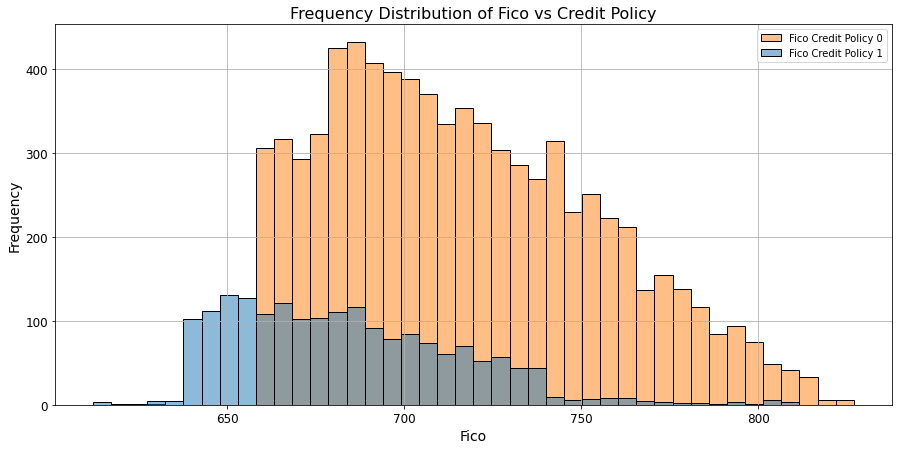

In [ ]:
ficoCreditPolicyDist()

---
**<h4>Question 3:** Create a function that generate distribution of fico feature concerning not fully paid feature.</h4>

---

<details>

**<summary>Hint:</summary>**

- You can plot the frequency distribution and proportion using seaborn histplot function.

- You can use hue parameter for the not.fully.paid feature and add some cosmetics to make you graph look better.

</details>

In [ ]:
def ficoNotFullyPaidDist():
  # Initiating a figure size of 15 X 7 inches
  plt.figure(figsize=(15, 7))

  # Plot histogram using seaborn api
  sns.histplot(data=data, x='fico', hue='not.fully.paid')
  plt.legend(labels=['Fico Not Fully Paid 0', 'Fico Not Fully Paid 1'])

  # Add some cosmetics
  plt.xticks(size=12)
  plt.yticks(size=12)
  plt.xlabel(xlabel='Fico', size=14)
  plt.ylabel(ylabel='Frequency', size=14)
  plt.title(label='Frequency Distribution of Fico vs Not Fully Paid', size=16)
  plt.grid(b=True)

  # Display the figure
  plt.show()

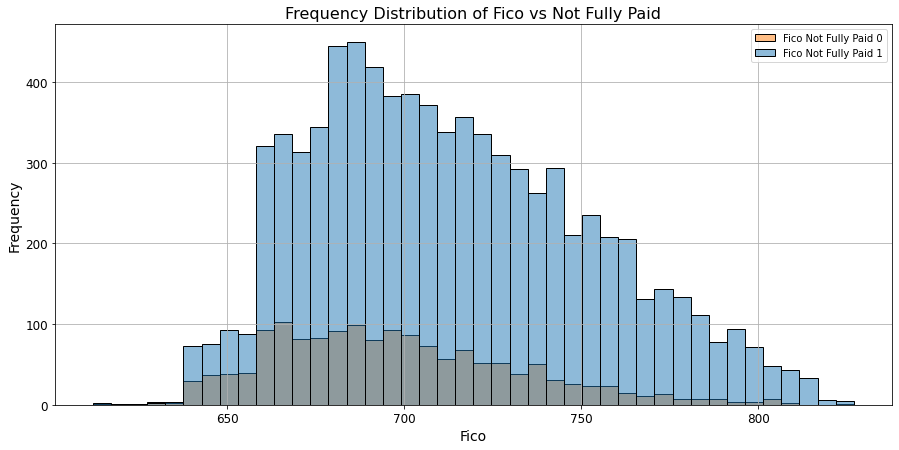

In [ ]:
ficoNotFullyPaidDist()

---
**<h4>Question 4:** Create a function that shows association between purpose and not fully paid feature.</h4>

---

<details>

**<summary>Hint:</summary>**

- You can plot the barplot and plot frequencies of categories using seaborn countplot function.

- You can use hue parameter for the not.fully.paid feature and add some cosmetics to make you graph look better.

</details>

In [ ]:
def purposeNotFullyPaid():
  # Initiating a figure size of 15 X 7 inches
  plt.figure(figsize=(15, 7))

  # Plot histogram using seaborn api
  sns.countplot(x='purpose', hue='not.fully.paid', data=data, palette='Set1')
  plt.legend(labels=['Purpose Not Fully Paid 0', 'Purpose Not Fully Paid 1'])

  # Add some cosmetics
  plt.xticks(size=12)
  plt.yticks(size=12)
  plt.xlabel(xlabel='Purpose', size=14)
  plt.ylabel(ylabel='Frequency', size=14)
  plt.title(label='Purpose vs Not Fully Paid', size=16)
  plt.grid(b=True)

  # Display the figure
  plt.show()

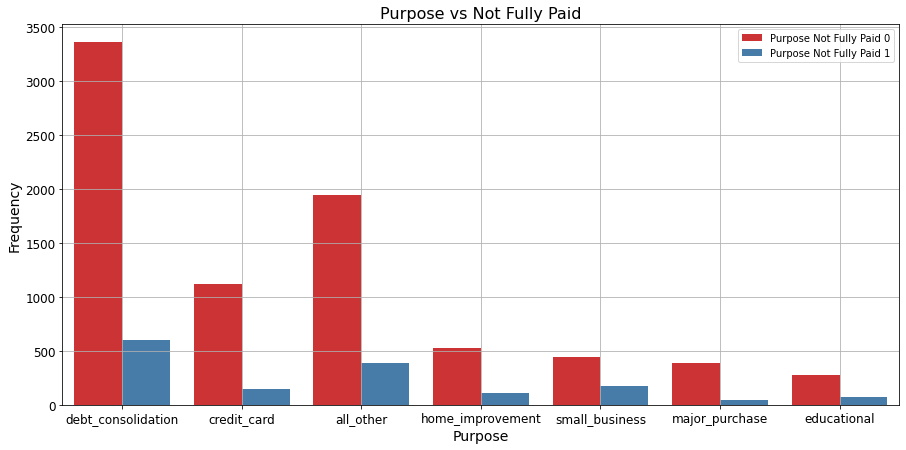

In [ ]:
purposeNotFullyPaid()

<a name = Section7></a>

---
# **7. Post Data Processing**
---


<a name = Section71></a>
### **7.1 Feature Encoding**

---
**<h4>Question 5:** Create a function that performs one hot encoding over the purpose feature.</h4>

---

<details>

**<summary>Hint:</summary>**

- You can use pandas .get_dummies() functionality to achieve the asked objective.

</details>

In [ ]:
def performEncoding(data=None, features=None):
  return pd.get_dummies(data=data, columns=features)

In [ ]:
data = performEncoding(data=data, features=['purpose'])
data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


<a name = Section72></a>
### **7.2 Feature Scaling**

---
**<h4>Question 6:** Create a function that performs standard scaling over the following set of features.</h4>

> int.rate, installment, log.annual.inc, dti, fico, days.with.cr.line, revol.bal, revol.util

---

<details>

**<summary>Hint:</summary>**

- Initialize data as input and output form.

- Initialize a list of features that needs to be scaled.

- Create a function that performs standard scaling over the features and returns a scaled dataframe.

</details>

In [ ]:
# Split the data into input and output
X = data.drop(labels=['not.fully.paid'], axis=1)
y = data['not.fully.paid']

# Initialize a list of scaled features
scalerlabels = ['int.rate', 'installment', 'log.annual.inc', 'dti', 
                'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']

In [ ]:
def dataScaler(data=None, labels=None):
  scaler = StandardScaler()
  Xtrans = scaler.fit_transform(data[labels])
  scaledframe = pd.DataFrame(data=Xtrans, columns=labels)
  return scaledframe

In [ ]:
X_scaled = dataScaler(data=data, labels=scalerlabels)
X_scaled.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602
2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683
3,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966
4,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586


---
**<h4>Question 7:** Create a function that concat scaled dataframe and dataframe that contains features apart from scalerlabels.</h4>

---

<details>

**<summary>Hint:</summary>**

- You can use .concat() functionality of pandas to concat features and return back the dataframe.

</details>

In [ ]:
def concatFrames():
  final_data = pd.concat(objs=[X_scaled, 
                               X.drop(labels=scalerlabels, 
                                      axis=1)], 
                         axis=1)
  return final_data

In [ ]:
final_data = concatFrames()
final_data.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,credit.policy,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,1,0,0,0,0,0,1,0,0,0,0
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,1,0,0,0,0,1,0,0,0,0,0
2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,1,1,0,0,0,0,1,0,0,0,0
3,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,1,1,0,0,0,0,1,0,0,0,0
4,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,1,0,1,0,0,1,0,0,0,0,0


<a name = Section73></a>
### **7.3 Data Preparation**

---
**<h4>Question 8:** Create a function that prepare the data according to the following model requirements.</h4>

- **Split** the data into **80:20** inside train_test_split.

- Make sure to set the **random_state = 42**.

---

<details>

**<summary>Hint:</summary>**

- You can use .train_test_split functionality of sklearn package to achieve the objective.

</details>

In [ ]:
def data_prep(input=None, output=None):
  X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.2, random_state=42, stratify=output)
  return X_train,X_test,y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = data_prep(input=final_data, output=y)

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section, you will develop decision tree-based model.

- Then **analyze the results** obtained and **make observations**.

- For **evaluation purposes** we will **focus** on the **precision and recall score**.

- **Remember** that we want to **generalize results** i.e. same results or error on testing data as that of training data.

---
**<h4>Question 9:** Create a function that develops decision tree model and output a confusion matrix.</h4>

---

<details>

**<summary>Hint:</summary>**

- To train decision tree model you can use sklearn package.

- Plot a side by side figure of confusion matrix using some beautiful cosmetics.

- You can use confusion_matrix function to generate a confusion maxtrix.

- Display the results.

</details>

In [ ]:
def trainDecisionGetConfusion():
  clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
  clf.fit(X_train, y_train)

  # Plotting confusion maxtrix of train and test data
  fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
  plot_confusion_matrix(estimator=clf, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
  plot_confusion_matrix(estimator=clf, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
  ax1.set_title(label='Train Data', size=14)
  ax2.set_title(label='Test Data', size=14)
  ax1.grid(b=False)
  ax2.grid(b=False)
  plt.suptitle(t='Confusion Matrix', size=16)
  plt.show()

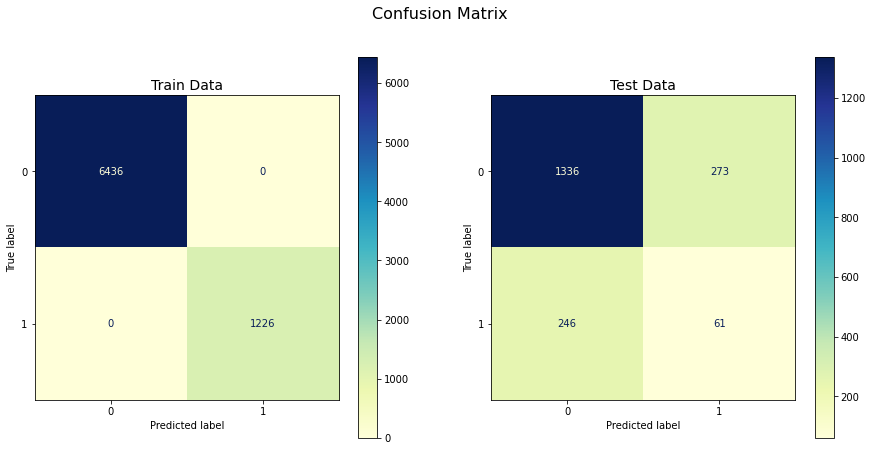

In [ ]:
trainDecisionGetConfusion()

**Observation:**

- **Train Data:**
  - Model predicted **6436 instances correctly** for **negative class** while **1226 instances** were predicted **correctly** for **positive class**.
  - Model **identified 0 instances negative but in actual** they **were positive**.
  - Model **identified 0 instances positive but in actual** they **were negative**.

- **Test Data:**
  - Model predicted **1336 instances correctly** for **negative class** while **61 instances** were predicted **correctly** for **positive class**.
  - Model **identified 273 instance negative but in actual** it **was positive**.
  - Model **identified 246 instances positive but in actual** they **were negative**.

---
**<h4>Question 10:** Create a function that generates a classification report using the decision tree classifier developed above.</h4>

---

<details>

**<summary>Hint:</summary>**

- To train decision tree model you can use sklearn package.

- Fit the data on training data and then predict on both train set and test set.

- Plot a side by side figure of confusion matrix using some beautiful cosmetics.

- Display the results.

</details>

In [ ]:
def getDecisionReport():
  clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
  clf.fit(X_train, y_train)

  # Predicting training and testing labels
  y_train_pred_count = clf.predict(X_train)
  y_test_pred_count = clf.predict(X_test)

  train_report = classification_report(y_train, y_train_pred_count)
  test_report = classification_report(y_test, y_test_pred_count)
  print('                    Training Report          ')
  print(train_report)
  print('                    Testing Report           ')
  print(test_report)

In [ ]:
getDecisionReport()

                    Training Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6436
           1       1.00      1.00      1.00      1226

    accuracy                           1.00      7662
   macro avg       1.00      1.00      1.00      7662
weighted avg       1.00      1.00      1.00      7662

                    Testing Report           
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1609
           1       0.18      0.20      0.19       307

    accuracy                           0.73      1916
   macro avg       0.51      0.51      0.51      1916
weighted avg       0.74      0.73      0.73      1916



**Observation:**

- We can observe that **training results** are **too good** to be true. This is called **overfitting**.

- On the test data report we can see that **class 0** is **performing well** while **class 1 is not**.

- Moreover, this **data** also **suffers** from **undersampling of minority class**.

- To **overcome** this problem you can perform **cross validation** or **SMOTE technique**.

<a name = Section9></a>

---
# **9. Conclusion**
---

- We **analyzed different features** and understood their nature and distribution.

- We performed **dummification** and **scaled** our **data** so that it can't affect our model outcome.

- We split the data in a **stratified** fashion and develop a decision tree model.

- We observed that the **results** obtained were **too good to be true** for training data.

- This happened due to the **overfitting** of data over the model.

- We also observed that results on the test set were not good because we have **undersampled data**.

- To solve the issue one either use **cross-validation** or **SMOTE** technique or perform **hyperparameter optimization**.
